# Sentiment Analysis using RNN, LSTM, Bi-directional LSTM, and GRU

This notebook implements sentiment analysis on the IMDB movie reviews dataset using different types of recurrent neural networks.

We use:
- Embedding layer
- Simple RNN
- LSTM
- Bidirectional LSTM
- GRU


In [3]:
# Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

In [4]:
# Load and preprocess dataset
vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Function to compile and train model
def compile_and_train(model, name):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Training {name}...")
    model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))
    print(f"Evaluating {name}...")
    loss, acc = model.evaluate(X_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}")

## RNN Model

In [6]:
rnn_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(rnn_model, "RNN")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training RNN...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.5876 - loss: 0.6743 - val_accuracy: 0.6311 - val_loss: 0.6470
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7366 - loss: 0.5661 - val_accuracy: 0.6506 - val_loss: 0.6292
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8457 - loss: 0.3638 - val_accuracy: 0.8252 - val_loss: 0.4219
Evaluating RNN...
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8205 - loss: 0.4294
RNN Accuracy: 0.8252


## LSTM Model

In [7]:
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(lstm_model, "LSTM")

Training LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.6979 - loss: 0.5503 - val_accuracy: 0.8619 - val_loss: 0.3308
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9004 - loss: 0.2572 - val_accuracy: 0.8712 - val_loss: 0.3185
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9372 - loss: 0.1723 - val_accuracy: 0.8702 - val_loss: 0.3350
Evaluating LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8715 - loss: 0.3352
LSTM Accuracy: 0.8702


## Bi-directional LSTM Model

In [8]:
bilstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
compile_and_train(bilstm_model, "Bi-directional LSTM")

Training Bi-directional LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6900 - loss: 0.5551 - val_accuracy: 0.8562 - val_loss: 0.3512
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9006 - loss: 0.2545 - val_accuracy: 0.8640 - val_loss: 0.3214
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.9251 - loss: 0.2041 - val_accuracy: 0.8606 - val_loss: 0.3482
Evaluating Bi-directional LSTM...
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8607 - loss: 0.3469
Bi-directional LSTM Accuracy: 0.8606


## GRU Model

In [9]:
gru_model = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    GRU(64),
    Dense(1, activation='sigmoid')
])
compile_and_train(gru_model, "GRU")

Training GRU...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6794 - loss: 0.5601 - val_accuracy: 0.8538 - val_loss: 0.3451
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8962 - loss: 0.2646 - val_accuracy: 0.8628 - val_loss: 0.3505
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9325 - loss: 0.1884 - val_accuracy: 0.8494 - val_loss: 0.3789
Evaluating GRU...
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8495 - loss: 0.3855
GRU Accuracy: 0.8494


**Plots for training/validation accuracy and loss with ROC**

Training RNN...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5940 - loss: 0.6496 - val_accuracy: 0.7734 - val_loss: 0.4860
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8415 - loss: 0.3654 - val_accuracy: 0.8394 - val_loss: 0.3805
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9332 - loss: 0.1797 - val_accuracy: 0.8427 - val_loss: 0.4101


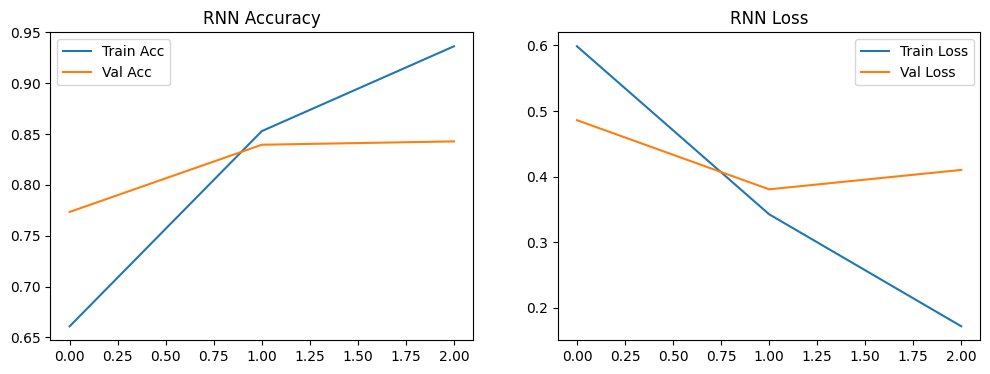

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8406 - loss: 0.4162
RNN Test Accuracy: 0.8427
Training LSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7205 - loss: 0.5290 - val_accuracy: 0.8645 - val_loss: 0.3199
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9128 - loss: 0.2303 - val_accuracy: 0.8677 - val_loss: 0.3539
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9397 - loss: 0.1664 - val_accuracy: 0.8670 - val_loss: 0.3364


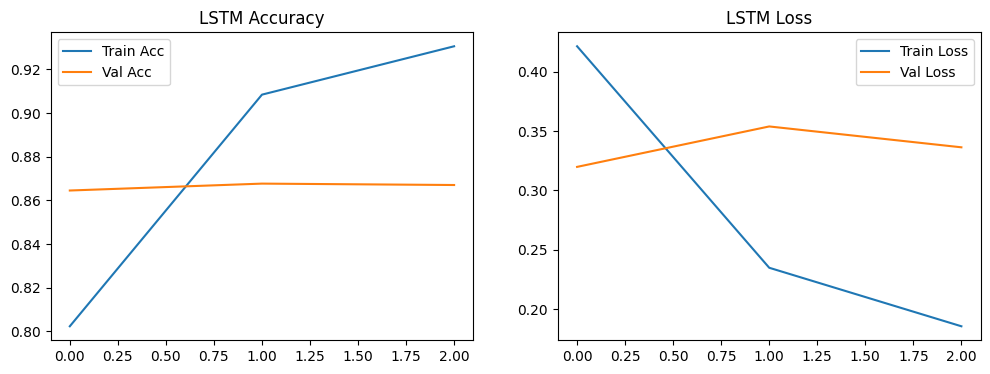

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8678 - loss: 0.3376
LSTM Test Accuracy: 0.8670
Training BiLSTM...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.6736 - loss: 0.5736 - val_accuracy: 0.8557 - val_loss: 0.3412
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8973 - loss: 0.2702 - val_accuracy: 0.8643 - val_loss: 0.3163
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9350 - loss: 0.1797 - val_accuracy: 0.8552 - val_loss: 0.4250


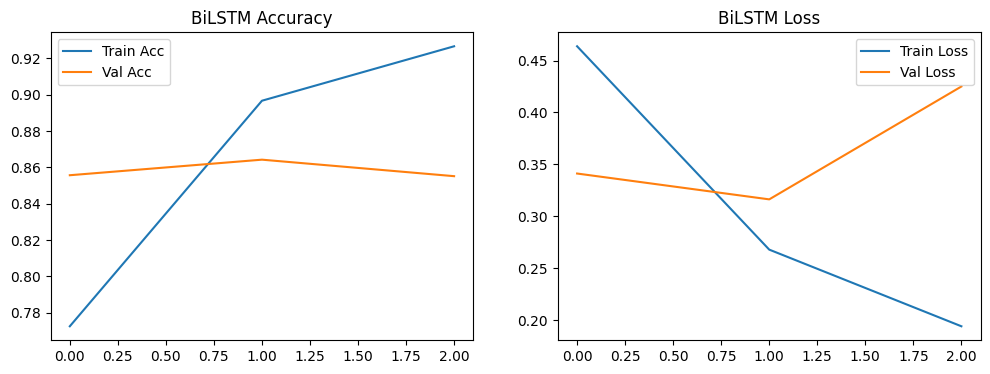

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8552 - loss: 0.4300
BiLSTM Test Accuracy: 0.8552
Training GRU...
Epoch 1/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.6722 - loss: 0.5705 - val_accuracy: 0.8432 - val_loss: 0.3579
Epoch 2/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9019 - loss: 0.2493 - val_accuracy: 0.8681 - val_loss: 0.3095
Epoch 3/3
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9342 - loss: 0.1753 - val_accuracy: 0.8577 - val_loss: 0.3324


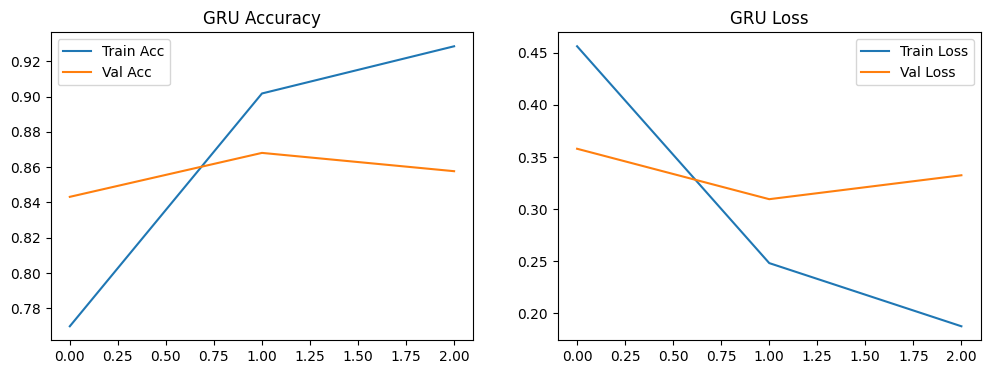

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8563 - loss: 0.3380
GRU Test Accuracy: 0.8577


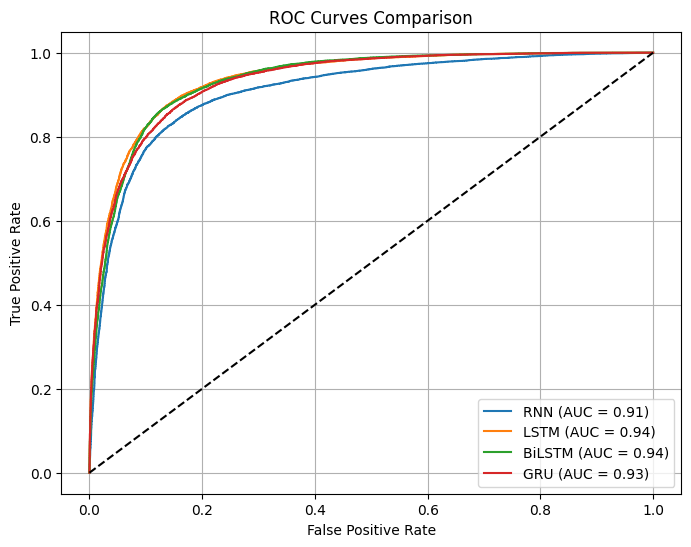

In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Bidirectional, Dense

# Load and preprocess IMDB dataset
vocab_size = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Function to compile, train, evaluate with plots and ROC
def compile_train_roc(model, name, model_preds):
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(f"Training {name}...")
    history = model.fit(X_train, y_train, epochs=3, batch_size=128, validation_data=(X_test, y_test))

    # Accuracy and Loss plots
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{name} Loss')
    plt.legend()
    plt.show()

    # Predictions and ROC
    y_pred_prob = model.predict(X_test)
    model_preds[name] = y_pred_prob
    loss, acc = model.evaluate(X_test, y_test)
    print(f"{name} Test Accuracy: {acc:.4f}")

# Train all models and collect predictions
model_predictions = {}

# RNN
rnn = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(rnn, "RNN", model_predictions)

# LSTM
lstm = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(lstm, "LSTM", model_predictions)

# Bi-directional LSTM
bilstm = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])
compile_train_roc(bilstm, "BiLSTM", model_predictions)

# GRU
gru = Sequential([
    Embedding(vocab_size, 128, input_length=maxlen),
    GRU(64),
    Dense(1, activation='sigmoid')
])
compile_train_roc(gru, "GRU", model_predictions)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for name, y_pred in model_predictions.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()
